# Brownian dynamics simulator

In [1]:
import numpy as np
from matplotlib.pyplot import *
%matplotlib notebook
from scipy import *
from tqdm.notebook import *

# Rk4 integrator and functions definitions

In [19]:
#########################
#numerical integrator####


def integrate_euler(F,t,y,tstop,dt):

    def euler(F,t,y,dt):
        #retorna o incremento apra utilizar na resolucao
        K0=dt*F(t,y)
        return K0

    T=[]
    Y=[]
    T.append(t)
    Y.append(y)
    
    pbar = tqdm(total=(tstop-dt))
    while t<tstop:
        pbar.update(dt)
        dt=min(dt,tstop-t)
        y=y+euler(F,t,y,dt)
        t=t+dt
        T.append(t)
        Y.append(y)

    return np.array(T),np.array(Y) 


##################################
#functions for simulating the dynamics

def harmonic_trap_potential(x,y,z,k,theta):
    kx=k[0]
    ky=k[1]
    kz=k[2]
    return 1/2 *((kx*(x*np.cos(theta)-y*np.sin(theta))**2)+
                     (ky*(x*np.sin(theta)+y*np.cos(theta))**2) + 1/2*kz*z**2)

def harmonic_trap(x,y,z,k,theta):

    
    kx=k[0]
    ky=k[1]
    kz=k[2]
    
    Fx = - (kx*(x*np.cos(theta)-y*np.sin(theta))*np.cos(theta)+(ky*(x*np.sin(theta)+y*np.cos(theta))*np.sin(theta)))
    Fy = - (-kx*(x*np.cos(theta)-y*np.sin(theta))*np.sin(theta)+(ky*(x*np.sin(theta)+y*np.cos(theta))*np.cos(theta)))
    Fz = - kz*z
    return Fx,Fy,Fz

def brownian_simulation(t_stop, dt, k, W, gamma, theta = 0, m=1,delta_x=0,delta_v=0):
    print('k',k)
    print('theta',theta)
    print('W',W)
    def F(t,y):

        Fi=np.zeros(6) #[x,vx,y,vy,z,vz]
        Fx,Fy,Fz = harmonic_trap(y[0],y[2],y[4],k,theta)
        
        #normalization factor of the noise - Variance of the noise must be equal to 1/dt
        W1 = W/np.sqrt(dt)
        
        Fi[0]=y[1] 
        Fi[1]= -(gamma/m) * y[1] + Fx/m   + W1/m*(np.random.normal(scale=1))
        
        Fi[2]=y[3]  
        Fi[3]= -(gamma/m) * y[3] + Fy/m  + W1/m*(np.random.normal(scale=1))
        
        Fi[4]=y[5] 
        Fi[5]= -(gamma/m) * y[5] + Fz/m + W1/m*(np.random.normal(scale=1))
            
        return Fi

    
    def initial_condition():
        y=np.zeros(6)

        for i in range(0,6,2):

            y[i] = delta_x*(1-2*np.random.rand())
            y[i+1] = delta_v*(1-2*np.random.rand())

        #define initial position
        y[0]= 100
        y[2]= 100
        y[4]= 100
        
        return y
    
    r0=initial_condition()
    T,Y=integrate_euler(F,0,r0,t_stop,dt)
    return T,Y


# Simulation of the Brownian Motion

In [20]:
#[kx,ky,kz] - parameters of the harmonic trap
k_0 = [.4,.2,.5]

#noise parameters
#drag parameter
m=1
gamma_0 = .2
kB = 1
T0 = 1
D = kB * T0 / gamma_0
W_0 = np.sqrt(2*kB*T0*gamma_0)


#xy angle
theta = 0


#simulation time, dt step
t_stop = 1000
dt = 0.01

#simulation Y is a vector with [x,vx,y,vy,z,vz](t)
initial_pos = []
T,Y = brownian_simulation(t_stop,dt, k_0, W_0, gamma = gamma_0, m = m , theta = theta, delta_x=2)

time = T
x_data = Y[:,0]
y_data = Y[:,2] 
z_data = Y[:,4]

k [0.4, 0.2, 0.5]
theta 0
W 0.6324555320336759


  0%|          | 0/999.99 [00:00<?, ?it/s]

In [21]:
k_0

[0.4, 0.2, 0.5]

# Parameters of the trap

<IPython.core.display.Javascript object>


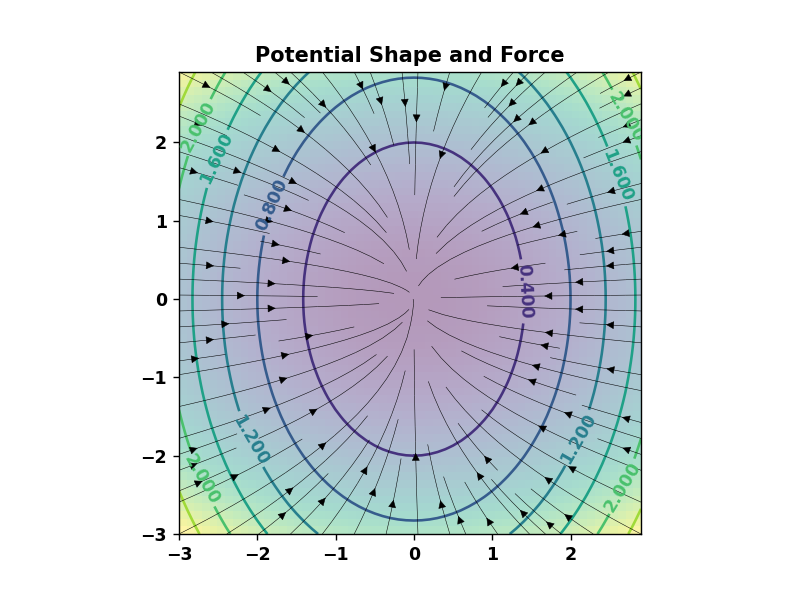

C:\Users\nunoa\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: scipy.transpose is deprecated and will be removed in SciPy 2.0.0, use numpy.transpose instead
  if __name__ == '__main__':


Text(0.5, 1.0, 'Potential Shape and Force')

In [22]:
x = np.arange(-3,3,0.1) 
y = np.arange(-3,3,0.1)
xx,yy = np.meshgrid(x,y)

Fx,Fy,Vz = harmonic_trap(xx,yy,0,k_0,theta)
V = harmonic_trap_potential(xx,yy,0,k_0,theta)

subplots()
imshow(transpose(V),extent=[np.min(x),np.max(x),np.min(y),np.max(y)],origin='lower',alpha=0.4)
CS = contour(V,extent=[np.min(x),np.max(x),np.min(y),np.max(y)])
clabel(CS, CS.levels, inline=True, fontsize=10)
streamplot(xx,yy,Fx,Fy, density=[1, 1],color='k', linewidth=0.3)
title('Potential Shape and Force')

# Plot the Signals Obtained

<IPython.core.display.Javascript object>


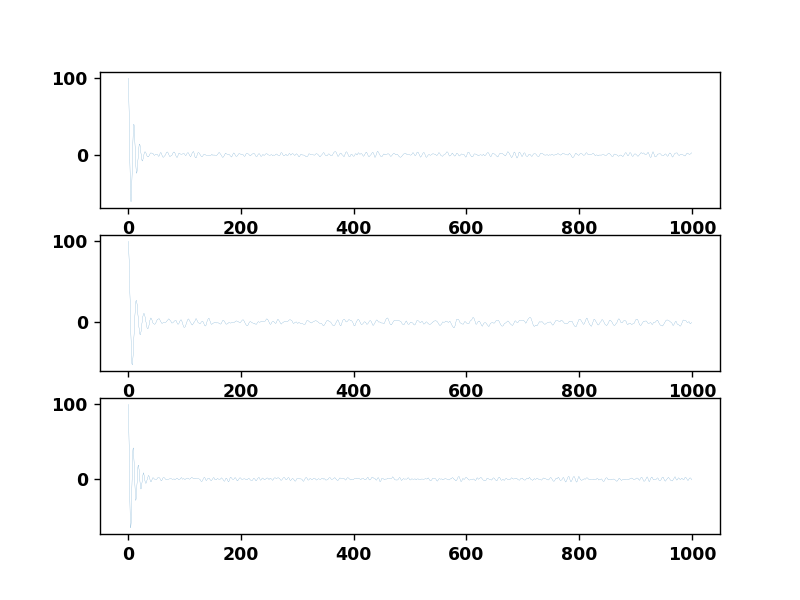

In [23]:
subplots()
title('Signals')
subplot(311)
plot(time, x_data,lw=0.1)
subplot(312)
plot(time, y_data,lw=0.1)
subplot(313)
plot(time, z_data,lw=0.1)

# Fit a damped oscillator model for the initial dynamics in x, y and z

# Compute the stiffness from the last part of the dynamics

# Compare the results with the predicted